# Kollokasjoner for nøkkelord

In [1]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
import dhlab.graph_networkx_louvain as gnl
from dhlab.module_update import update, css, code_toggle

In [2]:
css()

In [148]:
mu.code_toggle()

In [3]:
def categorize(list_of_words):
    proprium = [x for x in list_of_words if x[0].upper() == x[0]]
    other = [x for x in list_of_words if not x in proprium]

    return {'propr':proprium,
           'other': other }

def select_form(w):
    fs = [x.split()[0] for x in nb.word_form(w)]
    if 'verb' in fs:
        res = 'verb'
    elif 'subst' in fs:
        res = 'subst'
    elif len(fs) > 0:
        res = fs[0]
    else:
        res = 'unknown'
    return res

def sort_word_forms(words):
    res = {select_form(w):w for w in words}
    return res

def character_words(Character_name, number_of_words=50):
    res = {w:select_form(w) for w in categorize(list(nb.frame_sort(nb.frame(coll_matrix[Character_name]/tot['tot'], 'association')).head(number_of_words).index))['other']}
    result = {cat:[w for w in res if res[w] == cat] for cat in res.values()}
    return result

def mdprint(forskjell, cutoff=5):
    categories = categorize(forskjell[forskjell > cutoff].dropna().index)
    forms = {w:select_form(w) for w in categories['other']}
    Grouping = {cat:[word for word in forms if forms[word] == cat] for cat in forms.values()}
    navn = "## Benevnelser \n"
    navn += "<span style='font-size:150%'>{stuff}</span>".format(stuff= ', '.join(categories['propr']))
    pos = ""
    for cat in Grouping:
        pos += "## " + cat + "\n"
        pos += "<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(Grouping[cat]) ) + "\n"
    mu.printmd(navn)
    mu.printmd(pos)
    return

In [4]:
import pandas as pd

In [5]:
import ast

In [6]:
#colls_before = pd.read_json('demokrati_before.json')

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

In [14]:
tot = nb.frame(nb.totals(50000), 'tot')

# Lag et referanse-korpus

Det blir fryktelig stort, så 

In [51]:
r = nb.get_papers(top=5, cutoff=0, yearfrom=1950, yearto=1950)

In [52]:
df = pd.DataFrame(r).transpose()

In [64]:
df.sum(axis=1).loc[["kikhoste"]]

kikhoste    4.0
dtype: float64

In [16]:
reference = dict()
step = 1
for i in range(1950, 2000):
    print(i)
    reference[i] = nb.frame(nb.get_corpus(yearfrom = i, yearto = i + step, corpus = 'avis', samplesize=100).sum(axis=1), i)
    

1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999


In [17]:
pd.concat([reference[i] for i in reference], axis=1).to_json('avis_agg.json')

In [18]:
aggs = pd.concat([reference[i] for i in reference], axis=1)

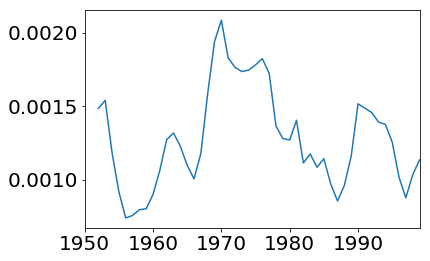

In [27]:
aggs.loc['demokrati'].rolling(window=3).mean().plot()

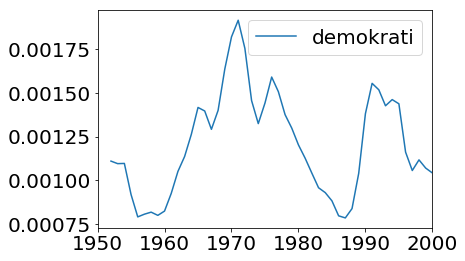

In [26]:
nb.nb_ngram('demokrati', corpus='avis', years=(1950, 2000)).plot()

In [32]:
def group_frames(df, bins=10, mode='rel'):
    agg = pd.DataFrame()
    step = 10
    if mode.startswith('a'):
        for i in range(0, len(df.columns), step):
            agg[df.columns[i]] = df[df.columns[i:i+step]].sum(axis=1)
    else:
        nb.normalize_corpus_dataframe(aggs)
        for i in range(0, len(df.columns), step):
            agg[df.columns[i]] = df[df.columns[i:i+step]].mean(axis=1)
    return agg

In [ ]:
En liten validering
Sjekker at enkelte ord har den fordelingen vi forventer, sånn at vi kan si at referansen speiler de faktiske forhold på en måte.

barchart("likestilling", reference);

barchart("østers", reference);

nb.nb_ngram('østers', corpus='avis', years=(1950, 2000)).plot()

barchart("likestilling", reference);

reference.loc['likestilling'].plot(kind='bar', rot= 0, figsize=(10,5))